# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [2]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

## Generating single value from normal distribution with given mean and variance

In [4]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(-1.1330)


## Sampling from categorical probabilities with given probabilities

In [5]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))
print(x)

tensor(1)


## Animating data

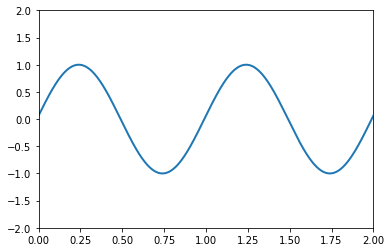

In [6]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

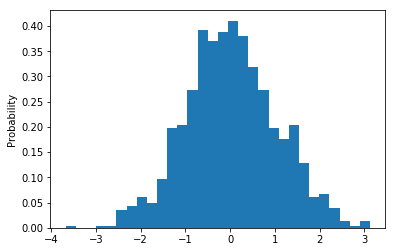

In [7]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

## Task 1

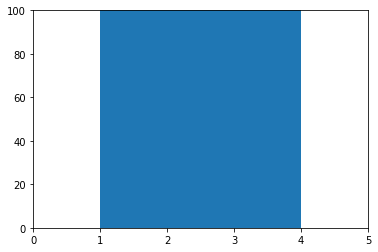

In [27]:
data = []

fig, ax = plt.subplots()
n, bins, patches = plt.hist([], bins=4, range=(1,4))

def update_hist(frameno):
    x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.1, 0.1, 0.1, 0.7])))
    data.append(x)
    n, bins = np.histogram(data, bins=4)
    for rect, h in zip(patches, n):
        rect.set_height(h)
    return patches

axes = plt.gca()
axes.set_xlim((0, 5))
axes.set_ylim((0, 100))

anim = animation.FuncAnimation(fig, update_hist, frames=1000, interval=20, blit=True)
HTML(anim.to_jshtml())

    

## Task 2

In [12]:
# Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

# it must be a simulator!
# sample from distribution using given probabilities
# repeate experiment and compare with Bayes equation

all_people =50000
nr_of_ill_people = 50
test_pos_healthy = 0.02
test_neg_ill = 0.01

def generate_people(nr_of_ill_people):
    people = []
    for i in range(all_people):
        ill = i < nr_of_ill_people
        data_dict = {}
        data_dict["Ill"]=ill
        if ill:
            data_dict["Test"]= np.random.random_sample() > test_neg_ill # pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([test_neg_ill, 1 - test_neg_ill])))
        else:
            data_dict["Test"]= np.random.random_sample() < test_pos_healthy # pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([1 - test_pos_healthy, test_pos_healthy])))
        people.append(data_dict)
    
    return people


def calculate_bayes(nr_of_ill_people):
    test_pos_ill = 1 - test_neg_ill
    prior_probablity_of_illness = nr_of_ill_people/all_people
    prior_probablity_of_healthy = 1 - prior_probablity_of_illness
    probability_of_positive_test = test_pos_ill*prior_probablity_of_illness+test_pos_healthy*prior_probablity_of_healthy
    result = test_pos_ill*prior_probablity_of_illness/probability_of_positive_test
    return result
    


def calculate_result(nr_of_ill_people):
    people = generate_people(nr_of_ill_people)
    nr_of_all_people_with_positive_test = 0
    nr_of_ill_people_with_positive_test = 0
    
    for person in people:
        if person['Test']:
            nr_of_all_people_with_positive_test += 1
            if person['Ill']:
                nr_of_ill_people_with_positive_test += 1
        
    return ((nr_of_ill_people_with_positive_test/nr_of_all_people_with_positive_test))


for i in range(1,101):
    sim = calculate_result(i)
    bay = calculate_bayes(i)
    print('\nSIMUL: '+ str(sim))
    print('BAYES: '+ str(bay))
    print('DIFF: ' + str(abs(sim - bay)))



SIMUL: 0.000999000999000999
BAYES: 0.0009890406305883294
DIFF: 9.960368412669559e-06

SIMUL: 0.0019305019305019305
BAYES: 0.0019761662374992517
DIFF: 4.5664306997321175e-05

SIMUL: 0.0029411764705882353
BAYES: 0.002961382377282109
DIFF: 2.0205906693873763e-05

SIMUL: 0.0039603960396039604
BAYES: 0.00394469458501016
DIFF: 1.5701454593800013e-05

SIMUL: 0.004930966469428008
BAYES: 0.0049261083743842365
DIFF: 4.85809504377141e-06

SIMUL: 0.006085192697768763
BAYES: 0.005905629237835796
DIFF: 0.00017956345993296648

SIMUL: 0.007368421052631579
BAYES: 0.006883262646629386
DIFF: 0.0004851584060021931

SIMUL: 0.007597340930674264
BAYES: 0.007859014050964517
DIFF: 0.0002616731202902522

SIMUL: 0.008530805687203791
BAYES: 0.008832888880076929
DIFF: 0.00030208319287313747

SIMUL: 0.00998003992015968
BAYES: 0.00980489254233931
DIFF: 0.00017514737782037097

SIMUL: 0.00980392156862745
BAYES: 0.010775030425361395
DIFF: 0.0009711088567339442

SIMUL: 0.011846001974333662
BAYES: 0.011743307896089517
D


SIMUL: 0.08831400535236396
BAYES: 0.09024612579762989
DIFF: 0.0019321204452659307
